# Text Classification using ML

##### Spam ham mail classification

![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Text Processing Pipeline

![image.png](attachment:image.png)

### Let's begin

In [ ]:
!pip install keras

In [ ]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
pip install --upgrade tensorflow keras


In [ ]:
# Importing libraries

import re

import pandas as pd

import numpy as np

import nltk

nltk.download('all')

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score

from tensorflow.keras.preprocessing.text import Tokenizer
#from keras.preprocessing.text import Tokenizer -- for older version

from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Embedding, Dense, Flatten, Dropout, BatchNormalization

from tensorflow.keras import Sequential

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

#### Dataset Loading

In [ ]:
# reading data

data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# drop unnecessary columns and rename cols

data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA

In [ ]:
# check missing values

data.isna().sum()

,0
label,0
text,0


In [ ]:
# check data shape

data.shape

(5572, 2)

<Axes: xlabel='label'>

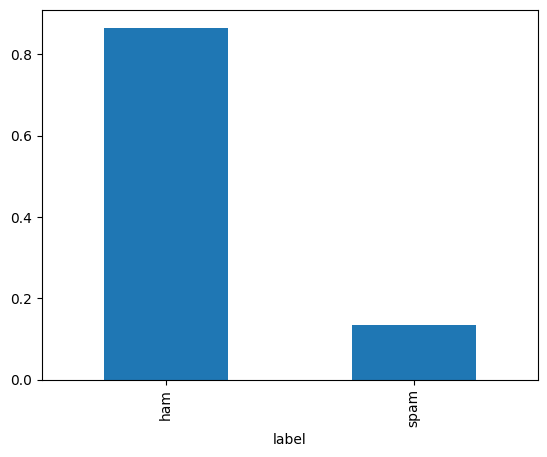

In [ ]:
# check target balance

data['label'].value_counts(normalize = True).plot.bar()

#### Text Preprocessing pipeline

In [ ]:
# text preprocessing i.e tokenization, then removing stopwords and punctuations, removing non-alphabets, lemmatization

def preprocess_pipeline(text_data):
    # create a list text

    lemmatizer = WordNetLemmatizer() # lemmatization from nltk library.

    if str(type(text_data)) != "<class 'str'>": # next checking if the i/p is string.If its a string then apply this logic otherwise if dataframe then apply else logic.
        text = list(text_data)

        # preprocessing loop

        corpus = []

        for i in range(len(text)):

            r = re.sub('[^a-zA-Z]', ' ', text[i]) # substitute non-alphabet with blank space.

            r = r.lower() # lower case letters

            r = r.split() # split

            r = [word for word in r if word not in stopwords.words('english')] # filter the stopwords

            r = [lemmatizer.lemmatize(word) for word in r] # lemmatization

            r = ' '.join(r) #Join the final items

            corpus.append(r) # append it in a corpus.

        return corpus

    else: # doing same thing as above just without loop since its a dataframe.

        r = re.sub('[^a-zA-Z]', ' ', text_data)

        r = r.lower()

        r = r.split()

        r = [word for word in r if word not in stopwords.words('english')]

        r = [lemmatizer.lemmatize(word) for word in r]

        r = ' '.join(r)

        return r

In [ ]:
#assign corpus to data['text']
preprocessed_text = preprocess_pipeline(data['text']) # got a list. Each row is seperated by ,

print(preprocessed_text)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free', 'gonna home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'searching

In [ ]:
data['text'] = preprocessed_text

data.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [ ]:
data['label'] = np.where(data['label']=='ham', 0, 1)
data.head()
# this gives final cleaned data.

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


#### Train-Test split

In [ ]:
# Create Feature and Label sets

X = data['text']

y = data['label']


# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (3900,)
Testing Data :  (1672,)


#### Feature Extraction

In [ ]:
# Next converting these text emails to number.
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

print(X_train_cv.shape)

# transform X_test using CV

X_test_cv = cv.transform(X_test)

print(X_test_cv.shape) # 3900 and 1672 are rows. 5841 is the token size and it is +nt in cols. This can be a bigger number.
# The number of cols are huge. So we can use embeddings.


(3900, 5841)
(1672, 5841)


In [ ]:
# TfidfVectorizer model

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

print(X_train_vect.shape)

# transform X_test using CV

X_test_vect = vectorizer.transform(X_test)

print(X_test_vect.shape)

(3900, 5841)
(1672, 5841)


In [ ]:
# Installing gensim
%pip install gensim

In [ ]:
# Train Word2Vec model

from gensim.models import Word2Vec,KeyedVectors # from gensim we r importing word2vec model and keyedVectors.
# 54:30 , https://drive.google.com/drive/folders/17v8F7XrLgmRij_3h9BCyQkEL1qYM3-J7 , text classification using ML - 4th july
# KeyedVectors is used when we r training models and word2vec is used when we r using pretrained model.

sentences = [sentence.split() for sentence in X_train]
# list of list where 1st list has 1st row words or tokens. then 2nd list has 2nd row tokens.
# So, the number of rows, the number of tokens.
w2v_model = Word2Vec(sentences, vector_size=300, window=10, min_count=5, workers=4)
# vector size gives the shape of embeddings. So here vector_size=300 that means our o/p will have 300 columns.
# so earlier when we had (3900, 5841) 5841 cols, we didnt had any control because these are the tokens.
# but over here we have control on how many columns we want.
# So the embeddings/vectors will be of size equal to vector_size.
# window=10 means center mein 1 word and on left 10 words and on right 10 words.Left and right words will go as i/p
# and middle word will be predicted.
# min_count=5 means I will consider only those sentences which has minimum tokens 5.
# Now if u want to train your own w2v model, then this is a way,
# -------- its use we will see later -----------------

In [ ]:
# Generating embeddings
# for now just skip this part.

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train_embed = np.array([vectorize(sentence) for sentence in X_train])
X_test_embed = np.array([vectorize(sentence) for sentence in X_test])

##### Pre-trained embeddings

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec (smaller alternative)
model = api.load("word2vec-google-news-300")

print("Smaller pre-trained Word2Vec loaded!")


In [ ]:
# prompt: download GoogleNews-vectors-negative300.bin

import gensim.downloader as api

# Download the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

print("GoogleNews-vectors-negative300.bin downloaded and loaded!")


In [ ]:
model['man'].shape

In [ ]:
model['man'].shape
#embed_model['man'].shape
model.most_similar('cricket')
model.similarity('man','woman')
model.doesnt_match(['PHP','java','monkey'])
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec])

In [ ]:
#import gensim library
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
#replace with the path where you have downloaded your model.
pretrained_model_path = '/content/GoogleNews-vectors-negative300.bin.gz'
#initialise the pre trained model using load_word2vec_format from gensim module.
word_vectors = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

# Calculate cosine similarity between word pairs
word1 = "early"
word2 = "seats"
#calculate the similarity
similarity1 = word_vectors.similarity(word1, word2)
#print final value
print(similarity1)

word3 = "king"
word4 = "man"
#calculate the similarity
similarity2 = word_vectors.similarity(word3, word4)
#print final value
print(similarity2)


0.03583806
0.22942673


In [ ]:
word_vectors.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [ ]:
word_vectors.similarity('man','woman')

0.76640123

In [ ]:
word_vectors.doesnt_match(['PHP','java','monkey'])

'monkey'

In [ ]:
vec = word_vectors['king'] - word_vectors['man'] + word_vectors['woman']
word_vectors.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [ ]:
# Generating embeddings

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [word_vectors[word] for word in words if word in word_vectors]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train_embed_trained = np.array([vectorize(sentence) for sentence in X_train])
X_test_embed_trained = np.array([vectorize(sentence) for sentence in X_test])

#### Model Training and evaluation

#### Using CountVectorizer (BOW)

In [ ]:
# So 1st applying ML model. X_train_cv was generated by  CountVectorizer
# And we r applying an ML model.
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

LogisticRegression()

In [ ]:
# generate probabilities

probabilities = lr.predict_proba(X_test_cv)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.97354634 0.02645366]
 [0.98603386 0.01396614]
 [0.664941   0.335059  ]
 ...
 [0.99260453 0.00739547]
 [0.98932765 0.01067235]
 [0.96624568 0.03375432]]
-----------------

[0.02645366 0.01396614 0.335059   ... 0.00739547 0.01067235 0.03375432]


In [ ]:
predictions = np.where(probabilities[:,1]>=0.5, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

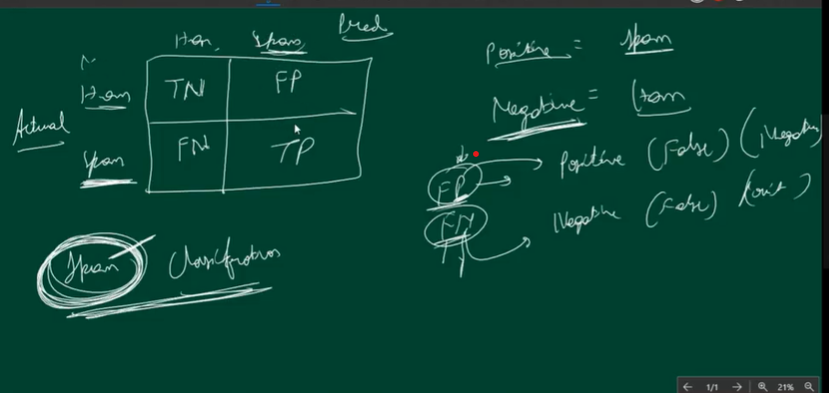

In [ ]:
# confusion matrix

# on left actual . On top Model Predicted.
# Now here we have +ve and -ve class. What is the objective of this dataset, to find spam.
# Since our target is to find spam, so our +ve class is spam and -ve class is ham.
# FP means model has predicted positive but its false.
# FN means model has predicted negative class but its a false prediction.
# In our case Actually mail is spam i.e. positive but model has predicted ham i.e. N  . SO this is FN : here 41
# Then, actually its ham but model predicted spam i.e. P so FP : here 1

from sklearn.metrics import confusion_matrix
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1452,1
spam,35,184


In [ ]:
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# Here, in this case of our dataset, if the precision score is good, then that is good
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.99
Recall: 0.84


In [ ]:
# loan defaulter prediction etc recall.
# here loan default is a +ve class and non-default will be a -ve class.
# if model predicts N but in actually its P, then FN - this is a dangerous position.
# So, recall is important. So here we should have maximum recall.
# lly for cancer prediction. having cancer is a positive class and non-cancer will be a -ve class.
# FN again.
# face verification -- verified -- +ve class
# not verified -- -ve class . FP-  so precision.

#### Using TFIDF

In [ ]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_vect, y_train)

LogisticRegression()

In [ ]:
# generate probabilities

probabilities = lr.predict_proba(X_test_vect)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.92654273 0.07345727]
 [0.93591744 0.06408256]
 [0.65051942 0.34948058]
 ...
 [0.94979007 0.05020993]
 [0.94736942 0.05263058]
 [0.91043437 0.08956563]]
-----------------

[0.07345727 0.06408256 0.34948058 ... 0.05020993 0.05263058 0.08956563]


In [ ]:
predictions = np.where(probabilities[:,1]>=0.5, 1, 0) # see confusion matrix and then change this to 0.7

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1447,6
spam,64,155


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.96
Recall: 0.71


#### Using Embeddings

In [ ]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_embed, y_train)

LogisticRegression()

In [ ]:
# generate probabilities

probabilities = lr.predict_proba(X_test_embed)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.95007528 0.04992472]
 [0.87753526 0.12246474]
 [0.80715643 0.19284357]
 ...
 [0.87596946 0.12403054]
 [0.93764863 0.06235137]
 [0.90158824 0.09841176]]
-----------------

[0.04992472 0.12246474 0.19284357 ... 0.12403054 0.06235137 0.09841176]


In [ ]:
predictions = np.where(probabilities[:,1]>=0.2, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1302,151
spam,176,43


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.22
Recall: 0.20


### Using Pre-trained embeddings

In [ ]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_embed_trained, y_train)

LogisticRegression()

In [ ]:
# generate probabilities

probabilities = lr.predict_proba(X_test_embed_trained)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.98668925 0.01331075]
 [0.88496419 0.11503581]
 [0.68893972 0.31106028]
 ...
 [0.98280242 0.01719758]
 [0.99829986 0.00170014]
 [0.79703609 0.20296391]]
-----------------

[0.01331075 0.11503581 0.31106028 ... 0.01719758 0.00170014 0.20296391]


In [ ]:
predictions = np.where(probabilities[:,1]>=0.9, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1444,9
spam,169,50


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
# recall is so low because some token have no meaning and they are not contributing anything as their
# embedding is also not present

Precision: 0.85
Recall: 0.23


In [ ]:
'''
So now a days, bow or tf-idf is not used at all.
'''

## Using ANN

In [ ]:
'''
model = Sequential()
model.add(Dense(64,input_shape = (5839,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.summary()
'''
# In keras embedding layer is already present which is better than word2vec.
# Update the input shape of the first Dense layer to match the actual number of features
model = Sequential()
model.add(Dense(64, input_shape=(X_train_cv.shape[1],), activation='relu')) # Change input_shape to (5841,) or X_train_cv.shape[1]
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         373,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377,033 (1.44 MB)

 Trainable params: 376,801 (1.44 MB)

 Non-trainable params: 232 (928.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

#### Using BOW

In [ ]:
model.fit(X_train_cv.toarray(), y_train, epochs=20, batch_size=4, validation_split=0.2)

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6734 - loss: 0.6100 - val_accuracy: 0.9321 - val_loss: 0.2440
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8781 - loss: 0.3119 - val_accuracy: 0.9538 - val_loss: 0.1540
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9007 - loss: 0.2571 - val_accuracy: 0.9641 - val_loss: 0.1342
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8987 - loss: 0.2425 - val_accuracy: 0.9667 - val_loss: 0.1248
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9258 - loss: 0.1979 - val_accuracy: 0.9692 - val_loss: 0.1148
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9301 - loss: 0.1883 - val_accuracy: 0.9667 - val_loss: 0.1071
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9241 - loss: 0.1907 - val_accuracy: 0.9705 - val_loss: 0.1218
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9415 - loss: 0.1581 - val_accuracy: 0

In [ ]:
probabilities = model.predict(X_test_cv.toarray())

probabilities

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[6.8758344e-03],
       [1.6417002e-03],
       [8.7952816e-01],
       ...,
       [3.6003737e-04],
       [6.2804939e-03],
       [5.1106981e-05]], dtype=float32)

In [ ]:
predictions = np.where(probabilities>=0.5, 1, 0)

predictions

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1450,3
spam,28,191


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.98
Recall: 0.87


#### Using TFIDF

In [ ]:
model = Sequential()
model.add(Dense(64,input_shape=(X_train_cv.shape[1],), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │         373,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377,033 (1.44 MB)

 Trainable params: 376,801 (1.44 MB)

 Non-trainable params: 232 (928.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_vect.toarray(), y_train, epochs=20, batch_size=4, validation_split=0.2)

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6516 - loss: 0.6360 - val_accuracy: 0.8692 - val_loss: 0.3460
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8614 - loss: 0.3589 - val_accuracy: 0.9295 - val_loss: 0.1994
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8824 - loss: 0.2777 - val_accuracy: 0.9564 - val_loss: 0.1444
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8993 - loss: 0.2463 - val_accuracy: 0.9590 - val_loss: 0.1235
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9184 - loss: 0.2137 - val_accuracy: 0.9641 - val_loss: 0.1151
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9148 - loss: 0.2116 - val_accuracy: 0.9692 - val_loss: 0.1114
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9315 - loss: 0.1785 - val_accuracy: 0.9718 - val_loss: 0.1040
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9474 - loss: 0.1684 - val_accuracy: 0.

In [ ]:
probabilities = model.predict(X_test_vect.toarray())

probabilities

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[2.3546195e-02],
       [2.6041700e-04],
       [5.6854689e-01],
       ...,
       [3.6027186e-04],
       [2.9180679e-04],
       [7.6505896e-03]], dtype=float32)

In [ ]:
predictions = np.where(probabilities>=0.6, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1453,0
spam,31,188


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 0.86


#### Using Embeddings

In [ ]:
model = Sequential()
model.add(Dense(128,input_shape = (300,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,785 (214.00 KB)

 Trainable params: 54,177 (211.63 KB)

 Non-trainable params: 608 (2.38 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_embed, y_train, epochs=10, batch_size=4, validation_split=0.2)

Epoch 1/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6775 - loss: 0.6341 - val_accuracy: 0.8026 - val_loss: 0.4877
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8628 - loss: 0.4012 - val_accuracy: 0.8090 - val_loss: 0.4676
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8614 - loss: 0.4200 - val_accuracy: 0.8654 - val_loss: 0.3829
Epoch 4/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8754 - loss: 0.3691 - val_accuracy: 0.8564 - val_loss: 0.3960
Epoch 5/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8625 - loss: 0.4063 - val_accuracy: 0.8654 - val_loss: 0.3918
Epoch 6/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8639 - loss: 0.3892 - val_accuracy: 0.8654 - val_loss: 0.3812
Epoch 7/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8600 - loss: 0.4047 - val_accuracy: 0.8654 - val_loss: 0.3843
Epoch 8/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8608 - loss: 0.3918 - val_accuracy: 0

In [ ]:
probabilities = model.predict(X_test_embed)

probabilities

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


array([[0.02138182],
       [0.03423551],
       [0.04186481],
       ...,
       [0.03463208],
       [0.02688882],
       [0.0309158 ]], dtype=float32)

In [ ]:
predictions = np.where(probabilities>=0.4, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1453,0
spam,219,0


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Using pre-trained embeddings

In [ ]:
model = Sequential()
model.add(Dense(128,input_shape = (300,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,785 (214.00 KB)

 Trainable params: 54,177 (211.63 KB)

 Non-trainable params: 608 (2.38 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_embed_trained, y_train, epochs=10, batch_size=4, validation_split=0.2)

Epoch 1/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6946 - loss: 0.5921 - val_accuracy: 0.8833 - val_loss: 0.2905
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8617 - loss: 0.3345 - val_accuracy: 0.9141 - val_loss: 0.2733
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8932 - loss: 0.2751 - val_accuracy: 0.9295 - val_loss: 0.2011
Epoch 4/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9115 - loss: 0.2450 - val_accuracy: 0.9321 - val_loss: 0.2293
Epoch 5/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9001 - loss: 0.2284 - val_accuracy: 0.9372 - val_loss: 0.1822
Epoch 6/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8920 - loss: 0.2576 - val_accuracy: 0.9423 - val_loss: 0.1699
Epoch 7/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9164 - loss: 0.2232 - val_accuracy: 0.9474 - val_loss: 0.1686
Epoch 8/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9106 - loss: 0.2223 - val_accuracy: 0

In [ ]:
probabilities = model.predict(X_test_embed_trained)

probabilities

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[0.04195279],
       [0.04347846],
       [0.53389126],
       ...,
       [0.00344365],
       [0.00619416],
       [0.14333212]], dtype=float32)

In [ ]:
predictions = np.where(probabilities>=0.8, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1446,7
spam,137,82


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.92
Recall: 0.37


#### Using Embeddings in Keras library

In [ ]:
# Tokenize the text data
# Tokenizer() here is from keras library. It is to perform tokenization.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train) # creating token for training data
X_test = tokenizer.texts_to_sequences(X_test) # creating token for testing data.

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 # in the corpus, total number of unique token is vocabulary
vocab_size

5863

In [ ]:
# Pad the sequences to a fixed length
max_length = 100 # not all the token has same size. So padding is done.It can be pre/post.
X_train = pad_sequences(X_train, maxlen=max_length, padding='post') # we have done post because then token will be 1st
# then padding will be there.
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
# Define the ANN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length)) # every document is of max_length
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.5880 - loss: 0.7182 - val_accuracy: 0.6667 - val_loss: 0.6837
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7962 - loss: 0.4820 - val_accuracy: 0.9051 - val_loss: 0.5177
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8978 - loss: 0.3341 - val_accuracy: 0.9551 - val_loss: 0.3049
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9602 - loss: 0.1983 - val_accuracy: 0.9667 - val_loss: 0.1295
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9749 - loss: 0.1287 - val_accuracy: 0.9679 - val_loss: 0.1122
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9776 - loss: 0.0953 - val_accuracy: 0.6385 - val_loss: 0.6976
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9874 - loss: 0.0713 - val_accuracy: 0.9628 - val_loss: 0.1059
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9864 - loss: 0.0704 - val_accuracy: 0.9744 - val_lo

In [ ]:
probabilities = model.predict(X_test)

probabilities

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


array([[0.01779784],
       [0.00819419],
       [0.8885409 ],
       ...,
       [0.03491027],
       [0.00695903],
       [0.01128837]], dtype=float32)

In [ ]:
predictions = np.where(probabilities>=0.9, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# confusion matrix


df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1452,1
spam,41,178


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.99
Recall: 0.81
